In [5]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
frutas = pd.read_csv('fruit_data_with_colors_miss.txt', delimiter='\t', na_values=['.','?'])
frutas.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,NaN,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79
5,2,mandarin,mandarin,80.0,5.8,4.3,0.77
6,2,mandarin,mandarin,80.0,5.9,4.3,0.81
7,2,mandarin,NaN,76.0,5.8,4.0,0.81
8,1,apple,braeburn,178.0,7.1,NaN,0.92
9,1,apple,braeburn,172.0,7.4,7.0,0.89


In [7]:
# Input de dados usando a média dos dados
frutas = frutas.fillna(frutas.mean())
frutas.head(10)


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.000000,8.4,7.300000,0.55
1,1,apple,granny_smith,180.000000,8.0,6.800000,0.59
2,1,apple,granny_smith,176.000000,7.4,7.200000,0.60
3,2,mandarin,mandarin,164.448276,6.2,4.700000,0.80
4,2,mandarin,mandarin,84.000000,6.0,4.600000,0.79
5,2,mandarin,mandarin,80.000000,5.8,4.300000,0.77
6,2,mandarin,mandarin,80.000000,5.9,4.300000,0.81
7,2,mandarin,NaN,76.000000,5.8,4.000000,0.81
8,1,apple,braeburn,178.000000,7.1,7.691379,0.92
9,1,apple,braeburn,172.000000,7.4,7.000000,0.89


In [8]:
X = frutas[['mass','height','width','color_score']]
y = frutas['fruit_label']

X.head(10)


,mass,height,width,color_score
0,192.000000,7.300000,8.4,0.55
1,180.000000,6.800000,8.0,0.59
2,176.000000,7.200000,7.4,0.60
3,164.448276,4.700000,6.2,0.80
4,84.000000,4.600000,6.0,0.79
5,80.000000,4.300000,5.8,0.77
6,80.000000,4.300000,5.9,0.81
7,76.000000,4.000000,5.8,0.81
8,178.000000,7.691379,7.1,0.92
9,172.000000,7.000000,7.4,0.89


In [9]:
y.head(10)

0    1
1    1
2    1
3    2
4    2
5    2
6    2
7    2
8    1
9    1
Name: fruit_label, dtype: int64

In [10]:
pca = PCA(n_components=2)
pca.fit(X)
X_Pca = pca.transform(X)
X_Pca

array([[ 2.75579655e+01,  8.62799158e-01],
       [ 1.55478584e+01,  1.16871459e+00],
       [ 1.15464491e+01,  6.63305453e-01],
       [-5.43955106e-02,  2.89462541e+00],
       [-8.04916876e+01,  1.93327589e+00],
       [-8.44978220e+01,  2.16122556e+00],
       [-8.44965183e+01,  2.17117933e+00],
       [-8.85013470e+01,  2.40873720e+00],
       [ 1.35491119e+01,  1.77804900e-01],
       [ 7.54432214e+00,  8.15590168e-01],
       [ 1.54316829e+00,  3.93598917e-01],
       [ 7.54893219e+00,  1.91040653e-01],
       [-1.04561239e+01,  4.45632309e-01],
       [-4.45514576e-01,  2.57875417e-03],
       [-1.24450408e+01,  2.72921885e-01],
       [-8.44732527e+00,  5.33097386e-01],
       [-8.44294034e+00,  1.25302500e-01],
       [ 3.55492823e+00,  1.72988570e-01],
       [-2.45107456e+00,  5.94720523e-01],
       [-2.45096151e+00,  4.86256813e-01],
       [-4.44501351e+00,  1.71142433e-01],
       [-8.44699496e+00,  2.09261369e-01],
       [-2.44495861e+01,  2.91878979e-01],
       [ 5.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_Pca,y)

In [12]:
train_scores = []
test_scores = []
n_neighbors = range(1,11)
for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))

for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_scores.append(knn.score(X_test, y_test))

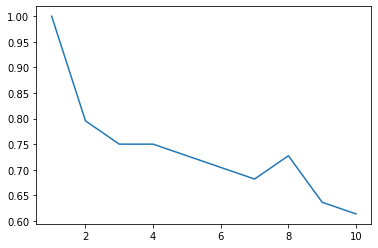

In [13]:
# Variação do parâmetro do n_neighbors de 1 a 10 usando o conjunto de treino
plt.plot(n_neighbors, train_scores)
plt.show()

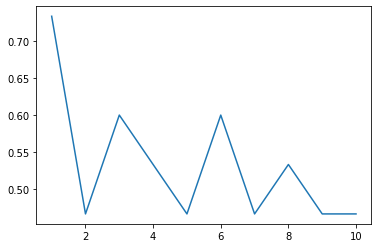

In [14]:
# Variação do parâmetro do n_neighbors de 1 a 10 usando o conjunto de teste
plt.plot(n_neighbors, test_scores)
plt.show()


In [15]:
# Baseado nos resultados da questão anterior, quanto maior o nº de neighbors mais baixo é a taxa de acerto. Isso é observado no gráfico de treino,  que se assemelham bastante ao resultado anterior. Quando chega a 8 vizinhos, sua taxa sobe para 0,75 se tornando a ideal para o modelo usando o PCA.
# Nos dados de teste, houve oscilações nos valores ao mudar o número de vizinhos - tornando 3, 6 e 8 os que atingiram as melhores pontuações.
